In [8]:
!pip install jupyterlab-lsp flake8 pylint
!pip install 'python-lsp-server[all]'


In [1]:
import torch
from mde.data.mono_dataset import KITTIRAWDataset
import matplotlib.pyplot as plt
import lightning as L
from torch import utils
from training_module import MDE,MyCallback
import matplotlib.pyplot as plt
from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from torchvision.transforms.functional import resize

mde = MDE()

logger = TensorBoardLogger("tb_logs", name="mde")
dataset = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            100,332,
                                           [0], 1,drives=[23], is_train=True)
                                           # [0], 1,drives=[1,2,23,27,19], is_train=True)
                                           # [0], 1,drives=[52,57,59,60,61,64], is_train=True)
dataset_val = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            100,332,
                                           [0], 1,drives=[117], is_train=False)
train_loader = utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=24)
val_loader = utils.data.DataLoader(dataset_val, batch_size=4, shuffle=False, num_workers=24)
trainer = L.Trainer( max_epochs=26,log_every_n_steps=5,callbacks=[EarlyStopping(monitor="g_val_loss",patience=3, mode="min"),MyCallback(dataset_val[38][0])],logger=logger)
trainer.fit(model=mde, train_dataloaders=train_loader,val_dataloaders=val_loader)



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                             | Params
-------------------------------------------------------------------
0 | mde_unet      | UNet                             | 31.0 M
1 | discriminator | Discriminator                    | 1.9 M 
2 | loss          | BCELoss                          | 0     
3 | mseLoss       | MSELoss                          | 0     
4 | ssim          | StructuralSimilarityIndexMeasure | 0     
-------------------------------------------------------------------
32.9 M    Trainable params
0         Non-trainable params
32.9 M    Total params
131.622   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/pytorch_msssim/ssim.py:48: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  out = conv(out, weight=win.transpose(2 + i, -1), stride=1, padding=0, groups=C)


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [2]:
from PIL import Image
import numpy as np

imgs_p = [mde.mde_unet(d[0].unsqueeze(0)).squeeze(0).permute(1,2,0).squeeze(0).detach().numpy() for d in dataset_val]
imgs_p = ((imgs_p/np.max(imgs_p))*255.0).astype(np.uint8)

imgs = [(d[0].squeeze(0).permute(1,2,0).detach().numpy() * 255).astype(np.uint8) for d in dataset_val]


imgs = [Image.fromarray(np.concatenate([i,np.repeat(j, 3, axis=2)],axis=0)) for i,j in zip(imgs,imgs_p)]
imgs[0].save("/app/array4.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)


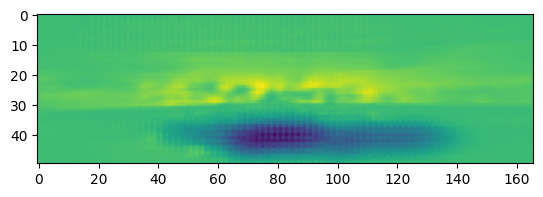

In [6]:
%matplotlib inline

for d in dataset_val:
    plt.imshow(mde.mde_unet(dataset_val[0][0].unsqueeze(0)).squeeze(0).permute(1,2,0).detach().numpy())
    break

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

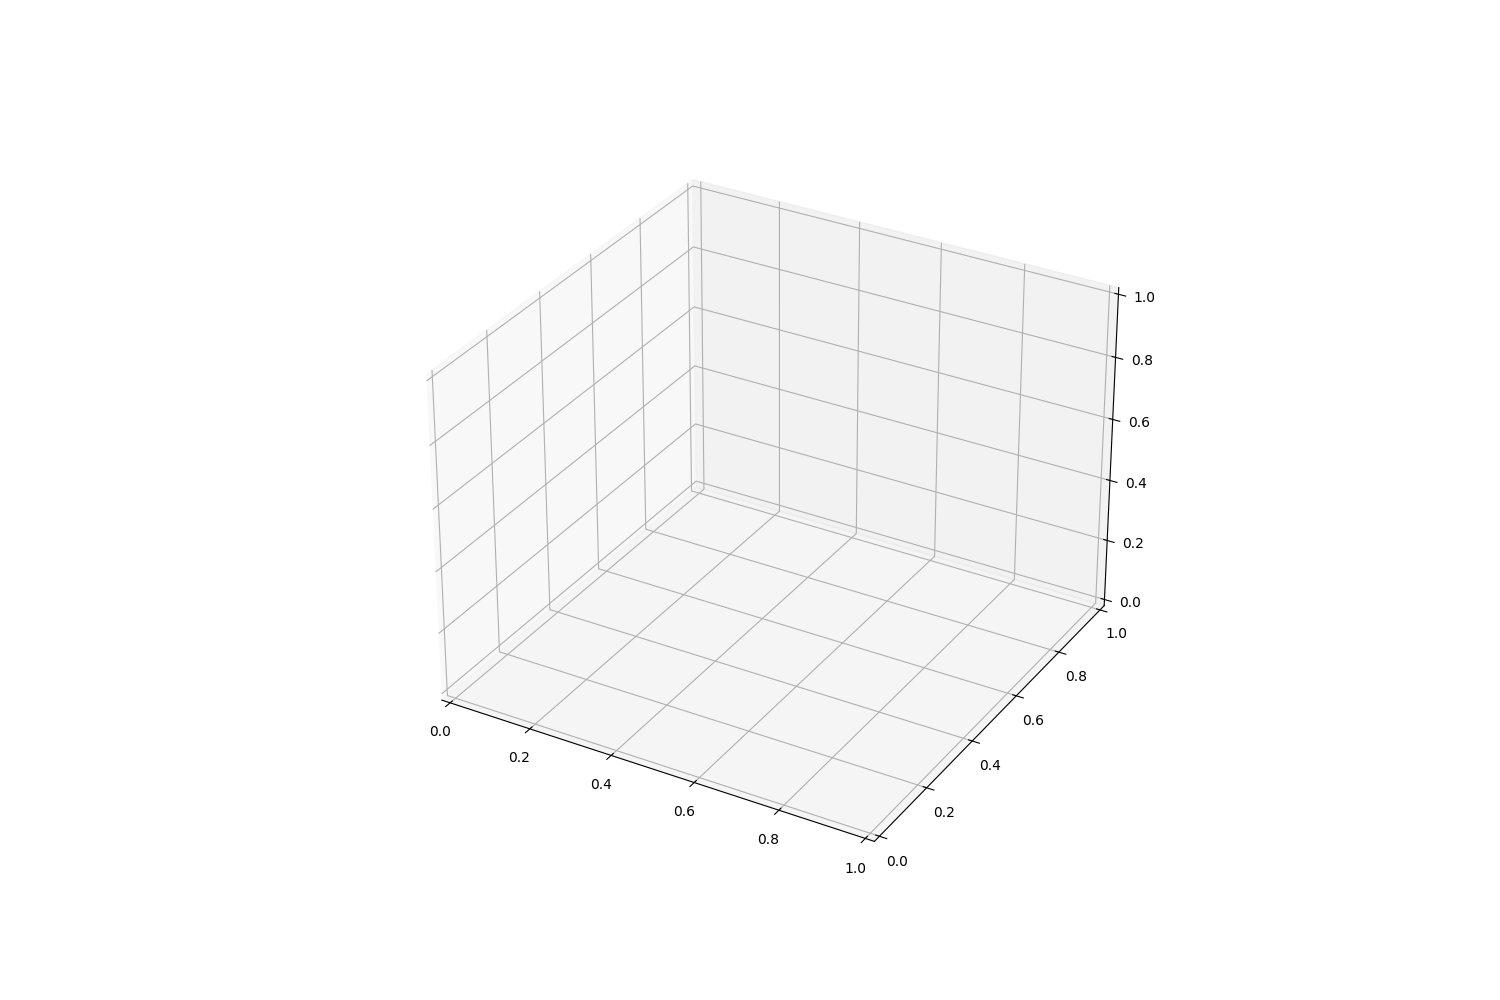

In [4]:
%matplotlib widget 
import numpy as np
from matplotlib import cm
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")

img=mde.mde_unet(dataset_val[0][0].unsqueeze(0)).squeeze(0).permute(1,2,0).squeeze(-1).detach().numpy()
X, Y = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))
ax.plot_surface(
    X,
    Y,
    img[X,Y],
    cmap=cm.coolwarm
   
)
ax.axis('equal')
plt.show()


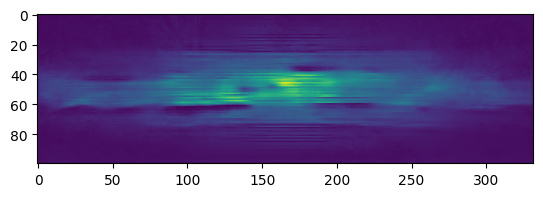

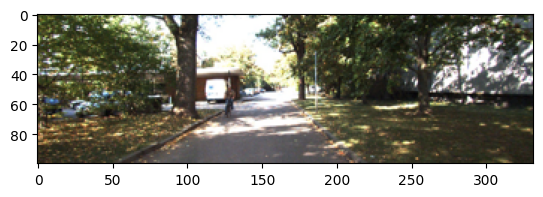

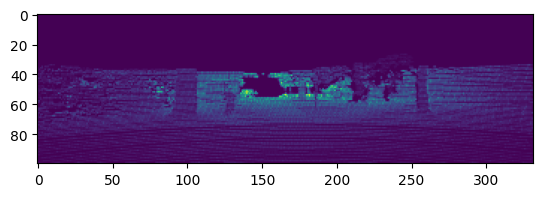

In [3]:
# %matplotlib inline
i=38

plt.imshow(mde.mde_unet(dataset_val[i][0].unsqueeze(0)).squeeze(0).permute(1,2,0).detach().numpy())
plt.show()
plt.imshow(dataset_val[i][0].squeeze(0).permute(1,2,0).detach().numpy() )
plt.show()
plt.imshow(dataset_val[i][1].squeeze(0).detach().numpy() )
plt.show()

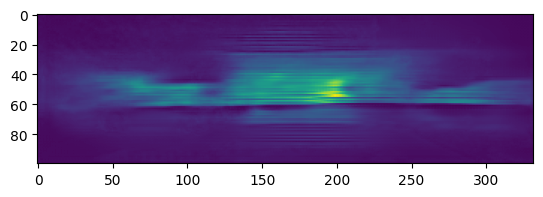

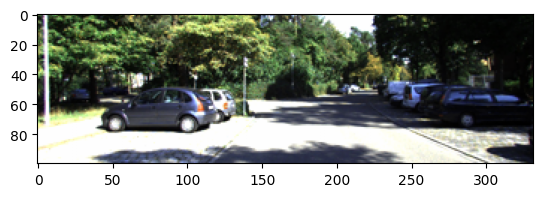

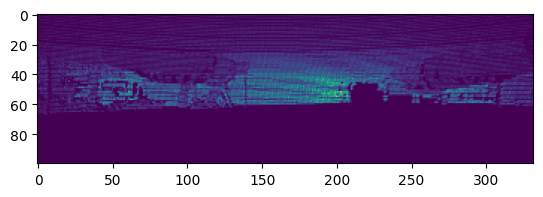

In [4]:
# %matplotlib inline
i=38

plt.imshow(mde.mde_unet(dataset[i][0].unsqueeze(0)).squeeze(0).permute(1,2,0).detach().numpy())
plt.show()
plt.imshow(dataset[i][0].squeeze(0).permute(1,2,0).detach().numpy() )
plt.show()
plt.imshow(dataset[i][1].squeeze(0).detach().numpy() )
plt.show()